<h1><center>Eksploratorna analiza podataka (EDA)</center></h1>

U ovom dokumentu cemo istraziti i statisticki opisati skup podataka o fizickim mjerama koje mogu indicirati pojavu boli u ledjima. <br>
Izvor podataka nam je poznata web-stranica *Kaggle*.

## 0. Motivacija

Bol u donjem dijelu ledja moze biti uzrokovana brojnim deformacijama u tjelesnoj strukturi:
1. Ukljestenjem velikih zivaca koji povezuju donji dio ledja i noge
2. Ukljestenjem manjih zivaca kojima vrvi donji dio ledja
3. Pretjerano ukruceni ili rastegnuti misic koji podrzava donji dio trupa (*erector spinae*)
4. Ostecenja u kostima, ligamentima ili zglobovima koji podupiru donji dio ledja
5. Hernija diska u donjem dijelu ledja
6. ... 

Poremecaj u bilo kojem od ovih sustava moze izazvati jaku bol u donjem dijelu ledja, koja danas predstavlja veliki zivotni problem svakodnevice velikog dijela populacije, pogotovo s obzirom na sjedilacki nacin zivota koji nadalje potice takve probleme.

Ovaj skup podataka ce nam pomoci u identifikaciji ljudi koji imaju potencijal za bol u ledjima s obzirom na njihove trenutne fizicke mjere, te cemo ih po tome dijeliti na *normalne*, zdrave individue bez predispozicije zxa bol, te *abnormalne*.

## 1. Ucitavanje baze podataka

Prvo u kod unesimo sve potrebne biblioteke:

In [116]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
%matplotlib notebook

Zatim ucitajmo svoju bazu podataka:

In [117]:
podaci = pd.read_csv("Dataset_spine.csv")

Sada promotrimo kako izgleda nasa baza podataka:

In [118]:
podaci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


Cinjenica da nasi podatkovni "stupci" nemaju imena je nezgodna, medjutim lako vidimo da je zadnji stupac upravo onaj sa tim metapodacima, to jest on sadrzi imena nasih dimenzija:

In [119]:
podaci['Unnamed: 13'][:20]

0                                                   NaN
1                                                   NaN
2     Prediction is done by using binary classificat...
3                                                   NaN
4                                                   NaN
5            Attribute1  = pelvic_incidence  (numeric) 
6                   Attribute2 = pelvic_tilt (numeric) 
7         Attribute3 = lumbar_lordosis_angle (numeric) 
8                  Attribute4 = sacral_slope (numeric) 
9                 Attribute5 = pelvic_radius (numeric) 
10     Attribute6 = degree_spondylolisthesis (numeric) 
11                    Attribute7= pelvic_slope(numeric)
12                     Attribute8= Direct_tilt(numeric)
13                  Attribute9= thoracic_slope(numeric)
14                  Attribute10= cervical_tilt(numeric)
15                    Attribute11=sacrum_angle(numeric)
16                Attribute12= scoliosis_slope(numeric)
17                                              

Sada mozemo nase dimenzije imenovati analogno, te iz skupa podataka izbaciti stupac sa metapodacima:

In [120]:
podaci.drop(['Unnamed: 13'],axis=1,inplace=True)

In [121]:
podaci.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','State']
podaci.sample(5)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,State
32,44.936675,17.443838,27.780576,27.492837,117.980325,5.569620,0.816748,27.5218,13.8357,13.54721,-2.925586,36.0452,Abnormal
160,92.026308,35.392674,77.416963,56.633634,115.723530,58.057542,0.302442,30.0162,9.8318,11.21248,-19.264777,19.9972,Abnormal
25,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205,0.928688,14.6686,13.5700,16.12951,-17.630363,28.1902,Abnormal
43,66.285394,26.327845,47.500000,39.957549,121.219684,-0.799624,0.647626,9.0466,10.2636,13.50349,1.138079,34.3683,Abnormal
229,43.436451,10.095743,36.032224,33.340707,137.439694,-3.114451,0.283589,36.0097,11.0132,8.51675,-23.904190,35.0749,Normal


## 2. Opisna statistika nad podacima

Dakle nas generalni skup podataka je sada oblika:

In [85]:
podaci.shape

(310, 13)

Sto znaci da imamo 310 redaka u tablici, to jest podatke o 310 pacijenata, te 13 stupaca s raznim podacima. 
<br>
Od toga, stupac *State* oznacava kojoj klasi pripada pacijent - onoj *Abnormal*, to jest sa predispozicijom za razvijanje bolova u ledjima, ili *Normal*, to jest normalnim rasporedom kosti koji ne indicira bol u ledjima.
<br>
Preostalh 12 stupaca oznacava mjere raznih fizioloskih poremecaja kosti/drzanja tijela koji su relevantni za bolove u ledjima, te ce oni biti nase dimenzije.

Sada mozemo poceti analizirati nase podatke:

<IPython.core.display.Javascript object>


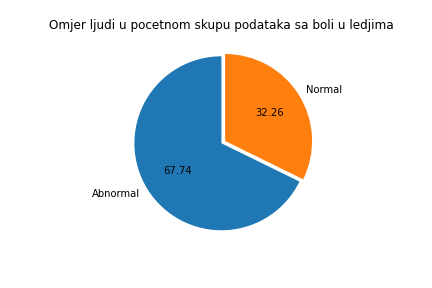

In [122]:
plt.title('Omjer ljudi u pocetnom skupu podataka sa boli u ledjima')
plt.pie(podaci['State'].value_counts(),
        labels=podaci['State'].value_counts().index,
        autopct='%.2f',
       explode=[0,0.05],startangle=90)
plt.show()

Sada mozemo promotriti sa metodom describe() iz *pandas* biblioteke kako izgleda raspodjela podataka u nasim stupcima s numerickim vrijednostima (dakle svima osim *Abnormal* stupca). 

Povratne vrijednosti za stupce su:
1. *count* ima li stupac redaka s NaN tipom podatka ili praznih redaka
2. statisticke vrijednosti:
    - srednju vrijednost (*mean*)
    - minimum, maksimum (*max, min*)
    - *$25$%, $50$%* i *$75$%* percentile 
    - standardnu devijaciju (*std*)

In [123]:
podaci.describe(include="all")

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,State
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,NaN


Vec iz ovih podataka mozemo naslutiti da imamo dosta outliera (jedan pogotovo znacajan je u *degree_spondylolisthesis* stupcu), sto mozemo i potvrditi sljedecom vizualizacijom:

<IPython.core.display.Javascript object>


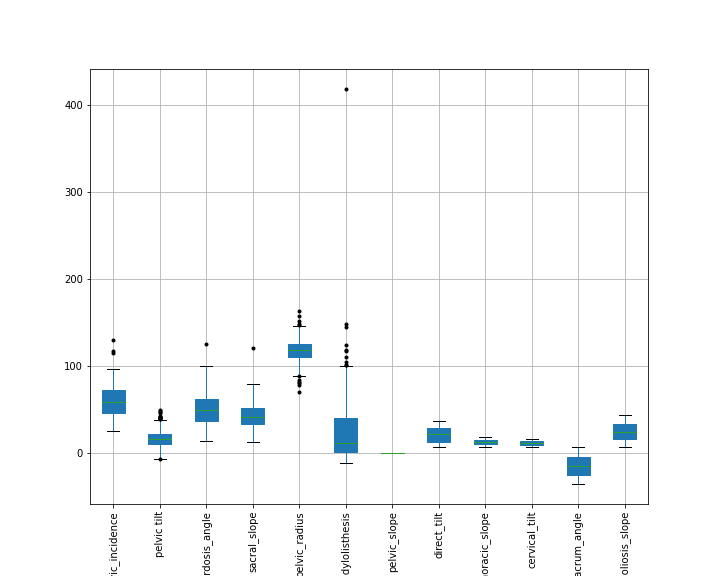

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

In [124]:


plt.subplots(figsize=(10,8))
podaci.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)



Prikazemo li iste podatke histogramima po stupcu, to bi izgledalo kao>

<IPython.core.display.Javascript object>


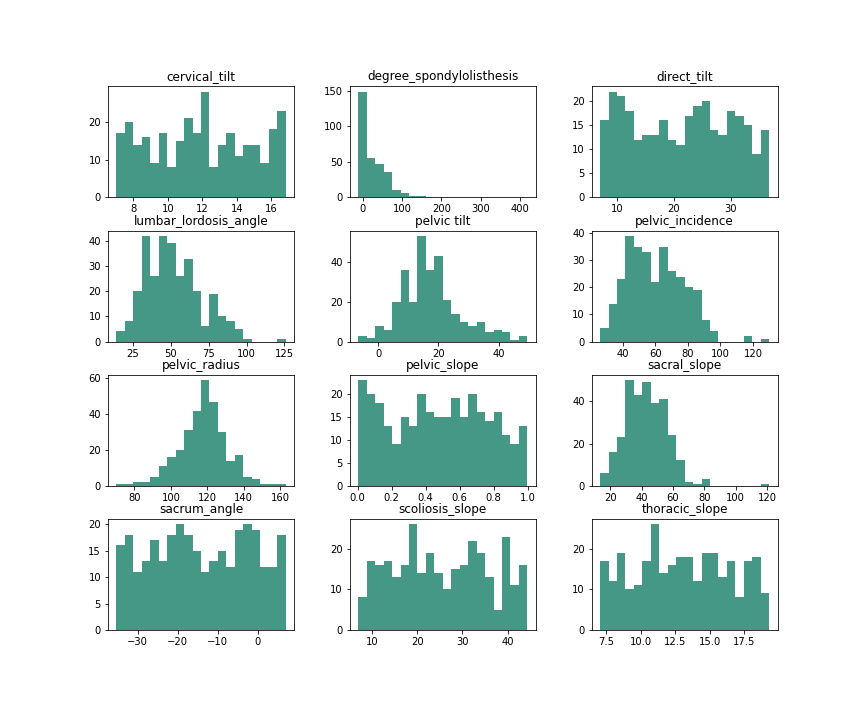

In [125]:
podaci.hist(figsize=(12,10),grid=False,bins = 20, color="#017359BB")
plt.show()

Sto nam pokazuje da distribucija vrijednosti podataka zaista ne slici normalnoj u vecini stupaca.

Nadalje, napravimo li dijagrame pravokutnika s obzirom na outliere u svakom stupcu (*dimenziji*) s obzirom na skup kojem pripada s obzirom na klasifikaciju *Abnormal* versus *Normal*, to jest postojanje boli u ledjima:

<IPython.core.display.Javascript object>


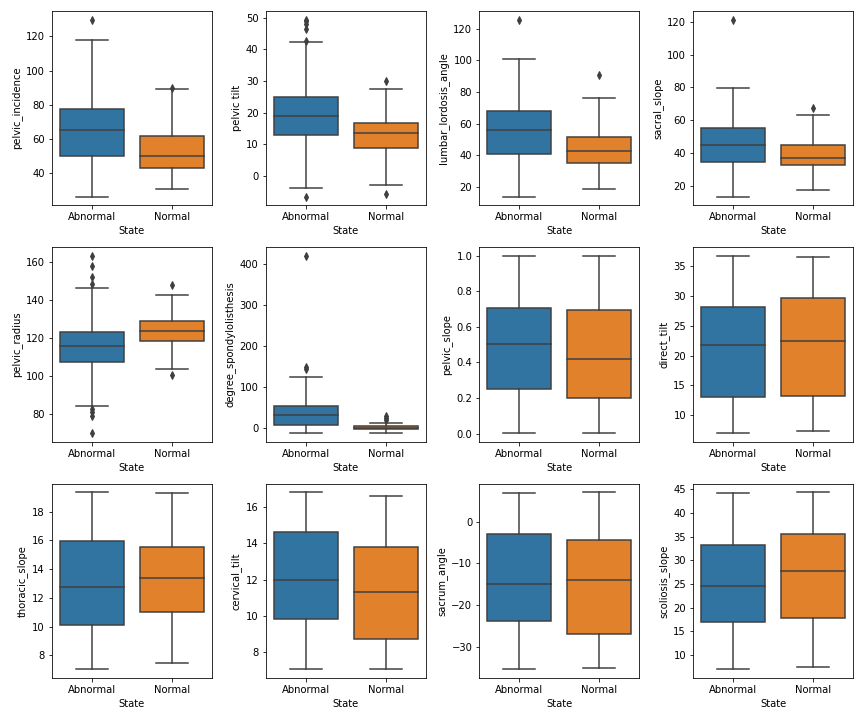

In [126]:
fig,ax = plt.subplots(nrows = 3, ncols=4, figsize=(12,10))

red = 0
stupac = 0
for i in range(len(podaci.columns)-1):
    if stupac > 3:
        red +=1
        stupac = 0
    axes = ax[red,stupac]
    sns.boxplot(x = podaci['State'], y = podaci[podaci.columns[i]],ax = axes)
    stupac += 1
plt.tight_layout()
plt.show()

## 3. Koeficijent korelacije

Ostalo nam je jos promotriti moguce veze (korelacije) izmedju dimenzija. 
<br>
To lako promotrimo sa:

<IPython.core.display.Javascript object>


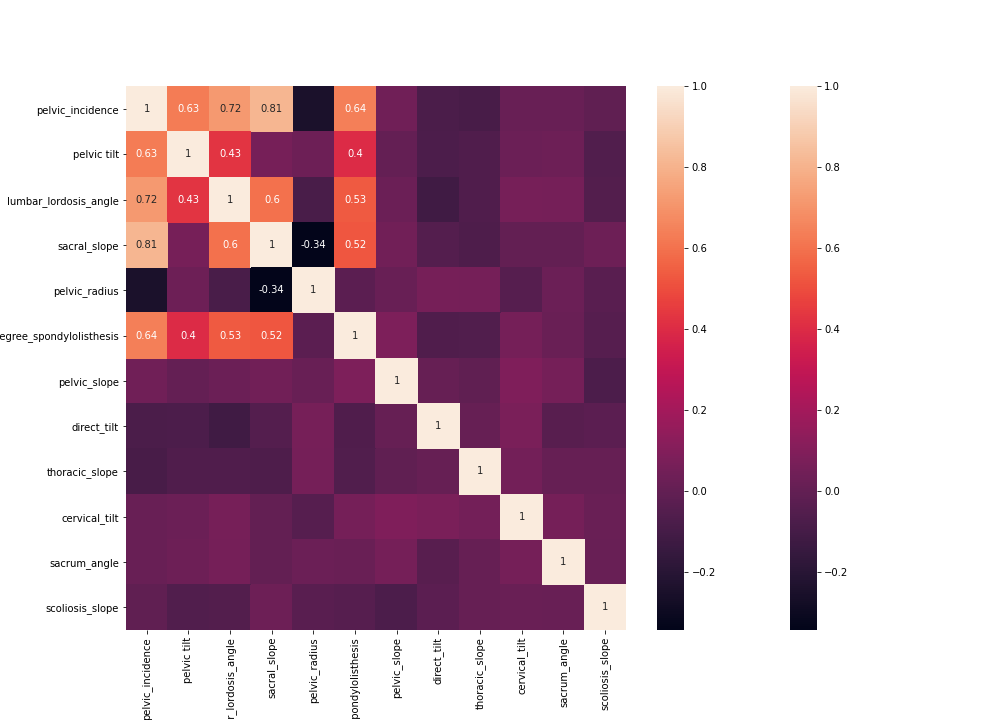

In [127]:
plt.subplots(figsize=(14,10))
sns.heatmap(podaci.corr())
sns.heatmap(podaci.corr()[podaci.corr().abs()>0.3],annot=True)

<IPython.core.display.Javascript object>


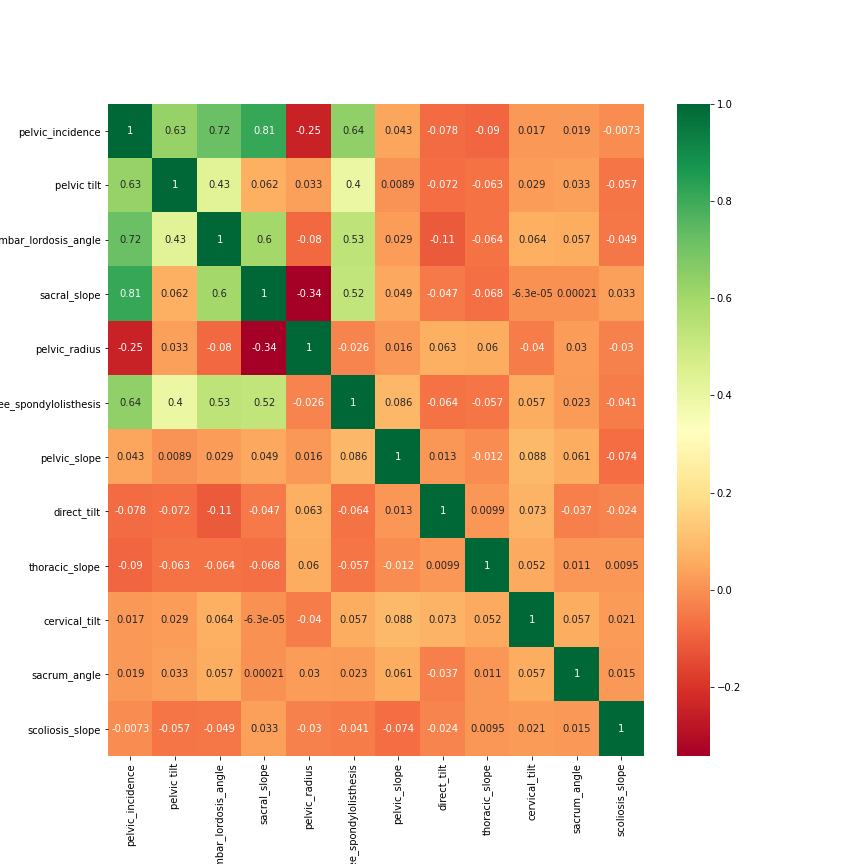

In [130]:


plt.figure(figsize=(12,12))
p=sns.heatmap(podaci.corr(), annot=True,cmap='RdYlGn') 



## 4. Izvor podataka

1. https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset